In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import tensorflow as tf
import joblib

# Data Preprocessing

In [2]:
dataset=pd.read_excel('customer_churn_large_dataset.xlsx',index_col=0)
dataset.dropna(axis = 0,  inplace = True)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 100000 entries, 1.0 to 100000.0
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Name                        100000 non-null  object 
 1   Age                         100000 non-null  float64
 2   Gender                      100000 non-null  object 
 3   Location                    100000 non-null  object 
 4   Subscription_Length_Months  100000 non-null  float64
 5   Monthly_Bill                100000 non-null  float64
 6   Total_Usage_GB              100000 non-null  float64
 7   Churn                       100000 non-null  float64
dtypes: float64(5), object(3)
memory usage: 6.9+ MB


In [4]:
dataset.isna().sum()

Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [5]:
dataset=dataset.iloc[:,1:]

In [6]:
from sklearn.preprocessing import LabelEncoder
cat_cols=['Gender','Location']
for cols in cat_cols:
    le = LabelEncoder()
    dataset[cols] = le.fit_transform(dataset[cols])

In [7]:
dataset.describe()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,44.027020,0.497840,1.995840,12.490100,65.053197,274.393650,0.497790
std,15.280283,0.499998,1.411638,6.926461,20.230696,130.463063,0.499998
min,18.000000,0.000000,0.000000,1.000000,30.000000,50.000000,0.000000
25%,31.000000,0.000000,1.000000,6.000000,47.540000,161.000000,0.000000
50%,44.000000,0.000000,2.000000,12.000000,65.010000,274.000000,0.000000
75%,57.000000,1.000000,3.000000,19.000000,82.640000,387.000000,1.000000
max,70.000000,1.000000,4.000000,24.000000,100.000000,500.000000,1.000000


In [8]:
dataset.corr()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.000832,-0.005889,0.003382,0.001110,0.001927,0.001559
Gender,0.000832,1.000000,-0.003314,0.000320,0.002239,-0.001385,0.002121
Location,-0.005889,-0.003314,1.000000,-0.001768,0.003716,0.002834,0.006405
Subscription_Length_Months,0.003382,0.000320,-0.001768,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,0.002239,0.003716,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.001385,0.002834,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002121,0.006405,0.002328,-0.000211,-0.002842,1.000000


<AxesSubplot:xlabel='Churn', ylabel='Subscription_Length_Months'>

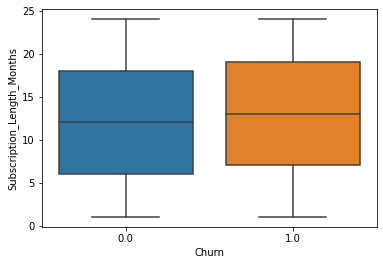

In [9]:
sns.boxplot(x = 'Churn', 
            y = 'Subscription_Length_Months', 
            data = dataset, )

In [10]:
x=dataset.drop('Churn',axis=1)
y=dataset['Churn']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# 1. LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [14]:
y_pred=classifier.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [16]:
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[8214, 6938],
       [7996, 6852]], dtype=int64)

In [17]:
accuracy_score(y_test, y_pred)

0.5022

In [18]:
recall_score(y_test, y_pred)

0.4614762931034483

In [19]:
precision_score(y_test, y_pred)

0.49688179840464103

In [20]:
f1_score(y_test, y_pred)

0.4785250366645715

# Model Optimization:

In [27]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 50.14 %
Standard Deviation: 0.38 %


In [28]:
#Applying Grid Search 
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet','none'],
              'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'max_iter':[100,1000,1500,2000]
    }
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
520 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Va

Best Accuracy: 50.19 %
Best Parameters: {'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}


# 2. KNeighborsClassifier

In [21]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [22]:
y_pred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [24]:
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[7660, 7492],
       [7585, 7263]], dtype=int64)

In [25]:
accuracy_score(y_test, y_pred)

0.49743333333333334

In [26]:
precision_score(y_test, y_pred)

0.49223991867163674

In [27]:
f1_score(y_test, y_pred)

0.490693510792825

# Model Optimization:

In [37]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 50.13 %
Standard Deviation: 0.53 %


In [ ]:
#Applying Grid Search 
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': [3, 5, 7], 
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

# 3.DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_features= 'auto', splitter= 'random')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto', random_state=0,
                       splitter='random')

In [24]:
y_pred = classifier.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [26]:
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[7575, 7577],
       [7406, 7442]], dtype=int64)

In [27]:
accuracy_score(y_test, y_pred)

0.5005666666666667

In [28]:
precision_score(y_test, y_pred)

0.49550569278913376

In [29]:
f1_score(y_test, y_pred)

0.4983426524257542

# Model Optimization

In [20]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 49.82 %
Standard Deviation: 0.44 %


In [21]:
#Applying Grid Search 
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_features': ['auto', 'sqrt', 'log2']
    }
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

Best Accuracy: 50.01 %
Best Parameters: {'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'}


# 4.RandomForestClassifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [51]:
y_pred = classifier.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [53]:
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[9120, 6032],
       [9114, 5734]], dtype=int64)

In [54]:
accuracy_score(y_test, y_pred)

0.4951333333333333

In [55]:
precision_score(y_test, y_pred)

0.48733639299677034

In [56]:
f1_score(y_test, y_pred)

0.4309010295333283

# Model Optimization

In [57]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 49.93 %
Standard Deviation: 0.41 %


In [59]:
#Applying Grid Search 
from sklearn.model_selection import GridSearchCV
parameters = {'criterion': ['gini', 'entropy', 'log_loss'],
    'max_features': ['auto', 'sqrt', 'log2']
    }
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\ProgramData\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\ProgramData\Anaconda3\lib\site-packages\jo

Best Accuracy: 49.93 %
Best Parameters: {'criterion': 'entropy', 'max_features': 'auto'}


# 5. ANN

In [31]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
ann.fit(x_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
2188/2188 [==============================] - 11s 3ms/step - loss: 0.7467 - accuracy: 0.5010
Epoch 2/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.6962 - accuracy: 0.5026
Epoch 3/50
2188/2188 [==============================] - 6s 3ms/step - loss: 0.6956 - accuracy: 0.5031
Epoch 4/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.6949 - accuracy: 0.5006
Epoch 5/50
2188/2188 [==============================] - 7s 3ms/step - loss: 0.6941 - accuracy: 0.5010
Epoch 6/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.6937 - accuracy: 0.5015
Epoch 7/50
2188/2188 [==============================] - 11s 5ms/step - loss: 0.6933 - accuracy: 0.5035
Epoch 8/50
2188/2188 [==============================] - 10s 5ms/step - loss: 0.6934 - accuracy: 0.5030
Epoch 9/50
2188/2188 [==============================] - 9s 4ms/step - loss: 0.6934 - accuracy: 0.4997
Epoch 10/50
2188/2188 [==============================] - 8s 4ms/step - loss: 0.

In [63]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)
y_pred

938/938 [==============================] - 3s 3ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [64]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [65]:
confusion_matrix(y_test, y_pred, labels = [0, 1])

array([[15152,     0],
       [14848,     0]], dtype=int64)

In [66]:
accuracy_score(y_test, y_pred)

0.5050666666666667

In [67]:
precision_score(y_test, y_pred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [68]:
f1_score(y_test, y_pred)

0.0

In [ ]:
#best Suited Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0, max_features= 'auto', splitter= 'random')
classifier.fit(x_train, y_train)

# Model Deployment

In [30]:
joblib.dump(classifier, 'churn_model.sav')

['churn_model.sav']